In [1]:
import numpy as np
import pandas as pd

import math
import random
# import itertools

import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [2]:
# importing csv for game data
game_df = pd.read_csv('data/games.csv')
game_df.head()

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


In [3]:
# selecting da bears
bears_games = game_df[game_df['homeTeamAbbr'] == 'CHI']

# getting the game IDs
bears_game_ids = bears_games['gameId'].values
print(bears_game_ids)
print()

bears_games.head()

[2018091700 2018093001 2018102102 2018102802 2018111100 2018111802
 2018120901 2018121603]



,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
28,2018091700,09/17/2018,20:15:00,CHI,SEA,2
49,2018093001,09/30/2018,13:00:00,CHI,TB,4
95,2018102102,10/21/2018,13:00:00,CHI,NE,7
111,2018102802,10/28/2018,13:00:00,CHI,NYJ,8
132,2018111100,11/11/2018,13:00:00,CHI,DET,10


In [4]:
# importing csv for week 2 data
week2_df = pd.read_csv('data/week2.csv')
week2_df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-14T00:23:24.700Z,29.73,26.60,0.00,0.00,0.00,81.40,98.80,None,382.0,Joe Flacco,5.0,QB,1,away,2018091300,60,right,NaN
1,2018-09-14T00:23:24.700Z,33.93,18.95,0.00,0.00,0.00,93.25,10.24,None,71269.0,Michael Crabtree,15.0,WR,1,away,2018091300,60,right,IN
2,2018-09-14T00:23:24.700Z,35.95,7.00,0.04,0.03,0.01,286.14,136.27,None,2533060.0,Dre Kirkpatrick,27.0,CB,1,home,2018091300,60,right,NaN
3,2018-09-14T00:23:24.700Z,44.51,36.03,0.77,0.67,0.08,264.78,322.29,None,2539233.0,Shawn Williams,36.0,SS,1,home,2018091300,60,right,NaN
4,2018-09-14T00:23:24.700Z,37.79,14.66,0.28,0.53,0.03,268.29,255.08,None,2543474.0,Darqueze Dennard,21.0,CB,1,home,2018091300,60,right,NaN


In [5]:
# filtering down to only bears game week 2
bears_week2_df = week2_df[week2_df['gameId'] == bears_game_ids[0]]
bears_week2_df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
1162211,2018-09-18T00:17:52.599Z,48.90,45.52,0.21,0.18,0.02,250.10,217.85,None,2495108.0,Prince Amukamara,20.0,CB,1,home,2018091700,117,right,NaN
1162212,2018-09-18T00:17:52.599Z,47.19,9.97,0.03,0.02,0.01,72.32,54.35,None,2495893.0,Brandon Marshall,15.0,WR,1,away,2018091700,117,right,GO
1162213,2018-09-18T00:17:52.599Z,52.20,32.56,0.24,0.23,0.03,264.68,234.13,None,2532961.0,Danny Trevathan,59.0,ILB,1,home,2018091700,117,right,NaN
1162214,2018-09-18T00:17:52.599Z,46.46,30.31,0.21,0.12,0.01,68.63,78.40,None,2532975.0,Russell Wilson,3.0,QB,1,away,2018091700,117,right,NaN
1162215,2018-09-18T00:17:52.599Z,46.68,45.54,0.01,0.01,0.00,100.97,214.63,None,2541966.0,Jaron Brown,18.0,WR,1,away,2018091700,117,right,GO


In [6]:
# filtering down to football data
bears_week2_football_df = bears_week2_df[bears_week2_df['displayName'] == 'Football']
bears_week2_football_df.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
1162225,2018-09-18T00:17:52.599Z,47.30,30.14,0.14,0.27,0.01,NaN,NaN,None,NaN,Football,NaN,NaN,1,football,2018091700,117,right,NaN
1162240,2018-09-18T00:17:52.700Z,47.30,30.15,0.15,0.31,0.01,NaN,NaN,None,NaN,Football,NaN,NaN,2,football,2018091700,117,right,NaN
1162255,2018-09-18T00:17:52.799Z,47.31,30.16,0.12,0.66,0.01,NaN,NaN,None,NaN,Football,NaN,NaN,3,football,2018091700,117,right,NaN
1162270,2018-09-18T00:17:52.900Z,47.32,30.16,0.09,0.64,0.01,NaN,NaN,None,NaN,Football,NaN,NaN,4,football,2018091700,117,right,NaN
1162285,2018-09-18T00:17:53.000Z,47.33,30.16,0.05,0.48,0.01,NaN,NaN,None,NaN,Football,NaN,NaN,5,football,2018091700,117,right,NaN


In [ ]:
bears_week2_football_df

In [8]:
# fetching x & y data as well as frames
football_x = bears_week2_football_df['x'].values
football_y = bears_week2_football_df['y'].values
football_frames = bears_week2_football_df['frameId'].values

football_frames

array([ 1,  2,  3, ..., 44, 45, 46], dtype=int64)

In [9]:
football_frames[:100] # be aware about frames jumpiong to 1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,  1,  2,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
       41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2],
      dtype=int64)

In [10]:
first_play_frames = football_frames[:45]
first_play_x = football_x[:45]
first_play_y = football_y[:45]

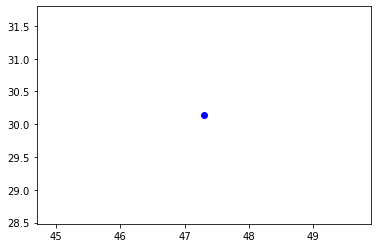

In [11]:
plt.plot(first_play_x[0], first_play_y[0], 'bo')

In [39]:
# making animation

def animationHelper(i, x, y, mat):
    # returns ith elements
    mat.set_data(x[i], y[i])
    return mat


def animatePlay(x, y, filename):
    # getting nump frames
    num_frames = len(x)
    
    # creating plot
    fig, ax = plt.subplots()
    
    # setting appropriate dims
    ax.set_xlim([0,120])
    ax.set_ylim([0,53.3])
    
    # plotting first point -- may be unneccessary?
    mat, = ax.plot(first_play_x[0], first_play_y[0], 'bo')
    
    ani = animation.FuncAnimation(fig, animationHelper, frames=num_frames, fargs=(x,y,mat))
    
    ani.save(filename)


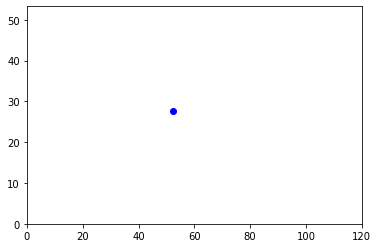

In [40]:
animatePlay(first_play_x, first_play_y, filename='first_play_bears.mp4')

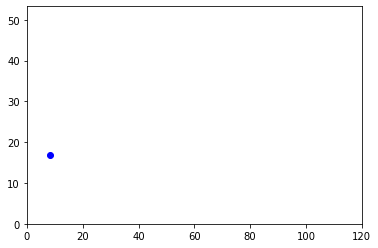

In [45]:
animatePlay(football_x, football_y, filename='football_test.mp4')